<a href="https://colab.research.google.com/github/ananyataneja/new/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import os , glob

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 807.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=f12236379ebc38510089832492c3728e24431d87d4fb17d1386bb7f99782901e
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

#Importing the dataset from Kaggle



In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ananya1024","key":"8b6f7c1730a47ac15680c1bf75a2c94e"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                     title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                 Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           5071        156  1.0              
joebeachcapital/students-performance                    Students Performance                             2KB  2023-08-31 00:50:11           1389         35  1.0              
nelgiriyewithana/global-youtube-statistics-2023         Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          16049        535  1.0              
iamsouravbanerjee/airline-dataset                       Airline Dataset                                  4MB  2023-08-30 12:0

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [04:06<00:00, 23.8MB/s]
100% 5.20G/5.20G [04:06<00:00, 22.6MB/s]


In [ ]:
!unzip  skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

#Data Analysis using csv file

In [ ]:
# Read the CSV file
csv_path = '/content/HAM10000_metadata.csv'
data = pd.read_csv(csv_path)

In [ ]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

In [ ]:
print(data.isnull().sum()) #no more null records

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64


In [ ]:
data["image_full_name"]=data["image_id"]+ ".jpg"

In [ ]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_full_name
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,ISIC_0031633.jpg


In [ ]:
data=np.array(data)

In [ ]:
dictionary = {}
for row in data:
    key = row[7]
    value = row[2]
    dictionary[key] = value

#Making a Combined Directory

In [ ]:
import os
import shutil

In [ ]:
def copy_images(source_folder, destination_folder):
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        shutil.copy(source_path, destination_path)

In [ ]:
folder1_path = '/content/HAM10000_images_part_1'
folder2_path = '/content/HAM10000_images_part_2'

In [ ]:
combined_folder_path = 'all_images/'
if not os.path.exists(combined_folder_path):
    os.makedirs(combined_folder_path)

In [ ]:
copy_images(folder1_path, combined_folder_path)

In [ ]:
copy_images(folder2_path, combined_folder_path)

#Plotting an Image

In [ ]:
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

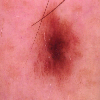

In [ ]:
img = utils.load_img("all_images/ISIC_0024306.jpg", target_size=(100,100))
img

In [ ]:
img = np.array(img)
img.shape

(100, 100, 3)

#Accomodating Data

In [ ]:
X= [] #images
Y= [] #labels

In [ ]:
folder = "all_images"

In [ ]:
for img_name in os.listdir(folder):
        img_path = folder +"/"+img_name
        img = utils.load_img(img_path, target_size=(100,100))
        img = np.array(img)
        X.append(img)
        label=dictionary[img_name]
        Y.append(label)

In [ ]:
x = np.array(X)
y= np.array(Y)

In [ ]:
x.shape

(10015, 100, 100, 3)

In [ ]:
y.shape

(10015,)

#Train-Test Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

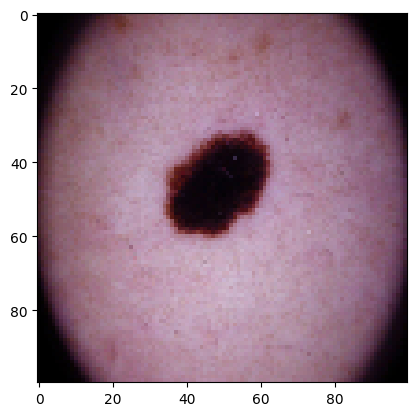

In [ ]:
plt.imshow(x_train[20])

#Label Encoding

In [ ]:
np.unique(y_train)

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype='<U5')

In [ ]:
 category2label = {"akiec" : 0, "bcc" : 1, "bkl" : 2, "df":3 , "mel" : 4, "nv" : 5, "vasc" : 6}

In [ ]:
 label2category = {0: "Actinic keratoses", 1: "Basal cell carcinoma", 2: "Benign keratosis-like lesions",
                   3: "Dermatofibroma", 4:"Melanoma" , 5:"Melanocytic nevi:", 6:"Vascular lesions"}

In [ ]:
y_train = np.array([category2label[label] for label in y_train])

In [ ]:
y_test = np.array([category2label[label] for label in y_test])

In [ ]:
y_train[:5]

array([5, 4, 4, 1, 4])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_new = to_categorical(y_train)

In [ ]:
y_test_new = to_categorical(y_test)
y_test_new.shape

(2003, 7)

In [ ]:
y_train_new[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

#Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape =(100, 100 ,3) ))
model.add(Convolution2D(64, (3,3), activation='relu' ))
model.add(MaxPooling2D())
model.add(Convolution2D(128, (3,3), activation='relu' ))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(7, activation = 'softmax'))

In [ ]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 67712)             0

In [ ]:
model.fit(x_train, y_train_new, batch_size=100, epochs=30)

Epoch 1/30
81/81 [==============================] - 5s 63ms/step - loss: 0.7008 - accuracy: 0.7525
Epoch 2/30
81/81 [==============================] - 5s 63ms/step - loss: 0.5611 - accuracy: 0.8002
Epoch 3/30
81/81 [==============================] - 5s 65ms/step - loss: 0.4443 - accuracy: 0.8415
Epoch 4/30
81/81 [==============================] - 5s 63ms/step - loss: 0.2835 - accuracy: 0.8990
Epoch 5/30
81/81 [==============================] - 5s 65ms/step - loss: 0.2436 - accuracy: 0.9130
Epoch 6/30
81/81 [==============================] - 5s 64ms/step - loss: 0.2072 - accuracy: 0.9302
Epoch 7/30
81/81 [==============================] - 5s 65ms/step - loss: 0.1696 - accuracy: 0.9431
Epoch 8/30
81/81 [==============================] - 5s 64ms/step - loss: 0.1646 - accuracy: 0.9468
Epoch 9/30
81/81 [==============================] - 5s 64ms/step - loss: 0.1630 - accuracy: 0.9446
Epoch 10/30
81/81 [==============================] - 5s 64ms/step - loss: 0.1902 - accuracy: 0.9317
Epoch 11/

In [ ]:
model.evaluate(x_train, y_train_new)

251/251 [==============================] - 2s 9ms/step - loss: 0.0624 - accuracy: 0.9774


[0.062365349382162094, 0.9774088859558105]

In [ ]:
model.evaluate(x_test, y_test_new)

63/63 [==============================] - 1s 9ms/step - loss: 4.6089 - accuracy: 0.6670


[4.608860492706299, 0.6669995188713074]

#Prediction for 1 Image

In [ ]:
img=x_test[20]

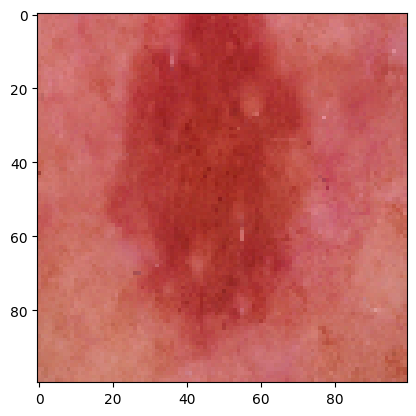

In [ ]:
plt.imshow(x_test[20])

In [ ]:
model.predict(img.reshape(1, 100, 100, 3))

1/1 [==============================] - 0s 213ms/step


array([[1.3956111e-22, 7.4994464e-27, 1.0206384e-14, 5.5028408e-31,
        2.2230689e-16, 1.0000000e+00, 1.1646671e-30]], dtype=float32)

In [ ]:
label2category[model.predict(img.reshape(1, 100, 100, 3)).argmax()]

1/1 [==============================] - 0s 19ms/step


'Melanocytic nevi:'

In [ ]:
label2category[y_test[20]]

'Melanocytic nevi:'

Hence our model gave an accurate prediction